# SSPINN
## Visualizer

Let's take a look at the visualizer that takes the output of the neural net and turns it into a molecular structure.

So, first we will import the class Visualizer from sspinn and then we will also import numpy. 

In [7]:
from sspinn.visualizer import Visualizer as Vis
import numpy as np

We can create an instance of this class using the following matrix from nn_translator_conn.txt (which is the `output[1]` from the nn_translator when `train = True`) and using a dictionary containing the empirical formula (which could be obtained from converting `output[0][0:11]` to a dictionary).

In [8]:
full = np.loadtxt('nn_translator_conn.txt')
empirical = {'H': 22, 'C': 15, 'O': 2}
v = Vis(full, empirical)

We can now look at the various parts of the Visualizer class starting with `self.full_mat`, which is a numpy array of the connectivity matrix for C15O2H22, which we defined above:

In [13]:
v.full_mat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Similarly, `self.empirical` contains the dictionary of the empirical formula, which we just defined above:

In [14]:
v.empirical

{'C': 15, 'H': 22, 'O': 2}

The variable `self.shift` contains the amount that each element is shifted to be put into the full connectivity matrix:

In [16]:
v.shift

{'B': 421,
 'Br': 407,
 'C': 183,
 'Cl': 397,
 'F': 385,
 'H': 0,
 'I': 413,
 'N': 327,
 'O': 346,
 'P': 419,
 'S': 424}

The function `self._genLabels()` generates a list of labels for the connectivity matrix based off of the empirical formula dictionary and stored them in the variable `self.labels`:

In [22]:
v._genLabels()
v.labels

['H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'O',
 'O']

The function `self._truncate()` takes the full connectivity matrix and removes all of the extra rows and columns so that it is now of size M by M, where M is the number of elements in the empirical formula (in this case it is 39 by 39 elements), which is stored in `self.adjmat`:

In [48]:
v._truncate()
v.adjmat

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

As before, we can see that there are no hydrogen hydrogen bonds:

In [51]:
for i in range(0,22):
    print(v.adjmat[i][0:22])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

While in the carbon carbon block there are single and double bonds present:

In [50]:
for i in range(22, 37):
    print(v.adjmat[i][22:37])

[0 1 0 1 0 0 0 0 0 0 0 0 0 0 0]
[1 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
[0 1 0 0 1 0 0 0 0 0 0 0 1 0 0]
[1 0 0 0 0 2 0 0 0 0 0 1 0 0 0]
[0 0 1 0 0 1 0 1 0 0 0 0 0 1 0]
[0 0 0 2 1 0 1 0 0 0 0 0 0 0 0]
[0 0 0 0 0 1 0 0 1 0 0 0 0 0 0]
[0 0 0 0 1 0 0 0 0 1 0 0 0 0 0]
[0 0 0 0 0 0 1 0 0 0 1 0 0 0 0]
[0 0 0 0 0 0 0 1 0 0 2 0 0 0 0]
[0 0 0 0 0 0 0 0 1 2 0 0 0 0 1]
[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]


And in the hydrogen carbon block there is a single bond for each hydrogen:

In [67]:
for i in range(22, 37):
    print(v.adjmat[i][0:22])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0]


Finally, the function `draw2Dstructure()` create an image of the predicted molecular structure (or in this case the molecular structure from the training data):

If the following command has an error relating to graphviz or pygraphviz not being installed:
1. `brew install graphviz` or `pip install graphviz`

2. `pip install --install-option='--library-path=/usr/local/Cellar/graphviz/2.40.1/lib' --install-option='--include-path=/usr/local/Cellar/graphviz/2.40.1/include' pygraphviz` where:

    a. `/usr/local/Cellar/graphviz/2.40.1/lib` is the path to graphviz lib
    
    b. `/usr/local/Cellar/graphviz/2.40.1/include` is the path to graphviz include

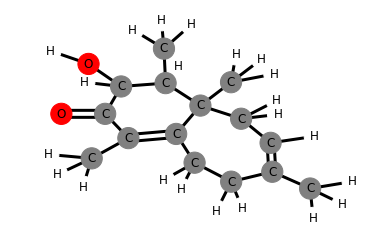

In [68]:
v.draw2Dstructure()

A graph of this type is the result of running SSPINN in full.